# Principal Component Analysis applied to the Iris Data Set

See https://en.wikipedia.org/wiki/Iris_flower_data_set for more information on this dataset.

In [32]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

# For deterministic results.
np.random.seed(5)

In [33]:
# Load data.
iris = datasets.load_iris()
X = iris.data
y = iris.target
pd.DataFrame(
    np.concatenate((X, y[:, None]), axis=1),
    columns=("sepal length", "sepal width", 
             "petal length", "petal width", "class"))

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [34]:
n_components = 3
pca = decomposition.PCA(n_components=n_components)
pca.fit(X)
# For each row X[i], the new X[i] is a vector of size 3 with PCA loadings
# (coefficients).
X = pca.transform(X)

In [35]:
pd.DataFrame(
    np.concatenate((X, y[:, None]), axis=1),
    columns=tuple("PC{}".format(i+1) for i in range(n_components)) +
    ("class",))

,PC1,PC2,PC3,class
0,-2.684126,0.319397,-0.027915,0.0
1,-2.714142,-0.177001,-0.210464,0.0
2,-2.888991,-0.144949,0.017900,0.0
3,-2.745343,-0.318299,0.031559,0.0
4,-2.728717,0.326755,0.090079,0.0
...,...,...,...,...
145,1.944110,0.187532,0.177825,2.0
146,1.527167,-0.375317,-0.121898,2.0
147,1.764346,0.078859,0.130482,2.0
148,1.900942,0.116628,0.723252,2.0


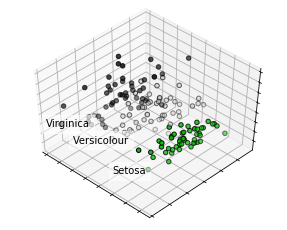

In [36]:
# Visualize the data by labels in 3D PCA space.
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

# Print label names at cluster centers.
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results.
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()